In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

import os

%matplotlib inline

### Downloading Data

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

68608000/68606236 [==============================] - 2s 0us/step


In [3]:
train_dir, validation_dir

('/tmp/.keras/datasets/cats_and_dogs_filtered/train',
 '/tmp/.keras/datasets/cats_and_dogs_filtered/validation')

In [4]:
%ls /tmp/.keras/datasets/cats_and_dogs_filtered/train
%ls /tmp/.keras/datasets/cats_and_dogs_filtered/validation

cats/  dogs/
cats/  dogs/


## No Data Augmentation
Below we have created first image data generator which has no data augmentation.

In [5]:
train_img_gen = ImageDataGenerator(rescale=1./255)
val_img_gen = ImageDataGenerator(rescale=1./255)

In [6]:
train_data_gen = train_img_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
val_data_gen = val_img_gen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Conv Model Creation

In [7]:
def create_conv_model(drop_prob=0.0):
    return Sequential([
        Conv2D(16, 3, activation='relu', input_shape=(150, 150 ,3)),
        MaxPooling2D(),
        Dropout(drop_prob),
        Conv2D(32, 3, activation='relu'),
        MaxPooling2D(),
        Dropout(drop_prob),
        Conv2D(64, 3, activation='relu'),
        MaxPooling2D(),
        Dropout(drop_prob),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

conv_model1 = create_conv_model(0.3)
conv_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

### Compiling Model

In [8]:
conv_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fitting Model to Train Data

In [9]:
%%time

history = conv_model1.fit_generator(train_data_gen,epochs=10,validation_data=val_data_gen)

Epoch 1/10
63/63 [==============================] - 12s 196ms/step - loss: 0.7889 - accuracy: 0.5260 - val_loss: 0.6959 - val_accuracy: 0.5250
Epoch 2/10
63/63 [==============================] - 10s 153ms/step - loss: 0.6850 - accuracy: 0.5465 - val_loss: 0.6786 - val_accuracy: 0.5930
Epoch 3/10
63/63 [==============================] - 10s 160ms/step - loss: 0.6664 - accuracy: 0.5855 - val_loss: 0.6554 - val_accuracy: 0.6240
Epoch 4/10
63/63 [==============================] - 10s 159ms/step - loss: 0.6194 - accuracy: 0.6405 - val_loss: 0.6360 - val_accuracy: 0.6530
Epoch 5/10
63/63 [==============================] - 9s 150ms/step - loss: 0.5959 - accuracy: 0.6745 - val_loss: 0.6162 - val_accuracy: 0.6690
Epoch 6/10
63/63 [==============================] - 9s 151ms/step - loss: 0.5830 - accuracy: 0.7030 - val_loss: 0.6061 - val_accuracy: 0.6880
Epoch 7/10
63/63 [==============================] - 9s 151ms/step - loss: 0.5523 - accuracy: 0.7255 - val_loss: 0.5655 - val_accuracy: 0.7070
Ep

In [10]:
def plot_acc_loss(history):
    with plt.style.context(('seaborn', 'ggplot')):
        plt.figure(figsize=(15,6))
        plt.subplot(121)
        plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Train Accuracy')
        plt.scatter(range(len(history.history['accuracy'])), history.history['accuracy'])
        plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation accuracy')
        plt.scatter(range(len(history.history['val_accuracy'])), history.history['val_accuracy'])
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend(loc='best')

        plt.subplot(122)
        plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Train Loss')
        plt.scatter(range(len(history.history['loss'])), history.history['loss'])
        plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='Validation Loss')
        plt.scatter(range(len(history.history['val_loss'])), history.history['val_loss'])
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend(loc='best')

### Plotting Resulting Accuracy and Loss

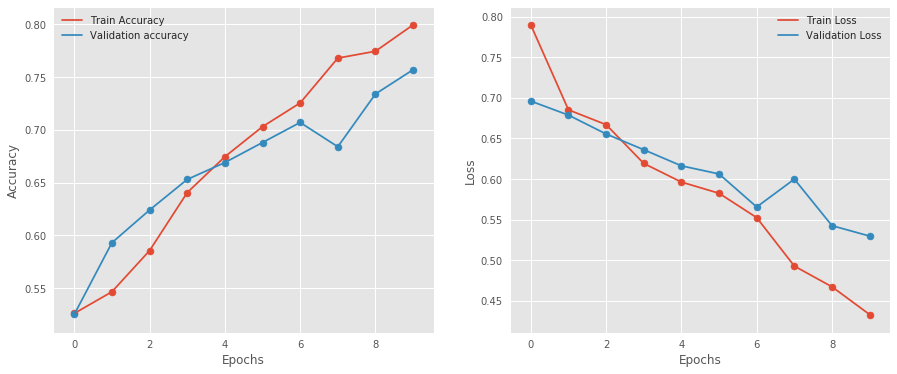

In [11]:
plot_acc_loss(history)

## Flipping Images Horizontally
Below we have added one kind of augmentation which flips image horizontally

In [12]:
train_img_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = train_img_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

val_img_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_data_gen = val_img_gen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Model Creation, Compilation and Fitting

In [13]:
%%time

conv_model1 = create_conv_model(0.3)
conv_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = conv_model1.fit_generator(train_data_gen,epochs=10,validation_data=val_data_gen)

Epoch 1/10
63/63 [==============================] - 11s 172ms/step - loss: 7.5860 - accuracy: 0.4990 - val_loss: 7.4869 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 10s 153ms/step - loss: 7.6666 - accuracy: 0.5000 - val_loss: 7.4869 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 10s 153ms/step - loss: 7.6891 - accuracy: 0.5000 - val_loss: 7.4869 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 10s 157ms/step - loss: 7.6516 - accuracy: 0.5000 - val_loss: 7.4869 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 10s 155ms/step - loss: 7.6666 - accuracy: 0.5000 - val_loss: 7.4869 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 10s 157ms/step - loss: 7.6591 - accuracy: 0.5000 - val_loss: 7.4869 - val_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 10s 156ms/step - loss: 7.6666 - accuracy: 0.5000 - val_loss: 7.4869 - val_accuracy: 0.5000

### Plotting Resulting Accuracy and Loss

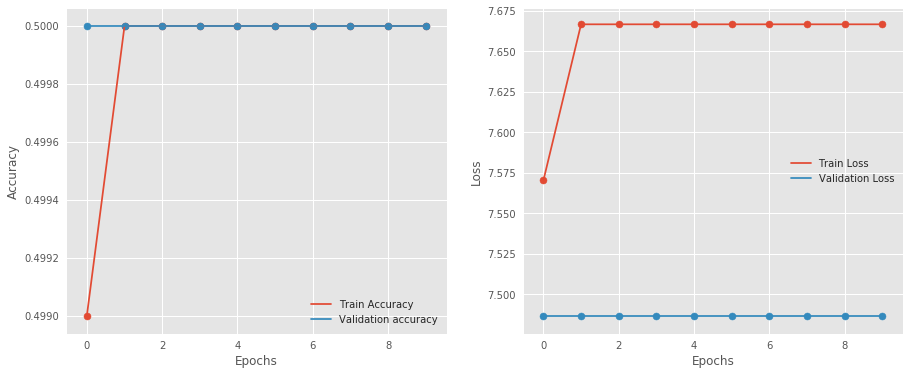

In [14]:
plot_acc_loss(history)

## Rotate Images
Trying image rotation by 30 degree data augmentation

In [15]:
train_img_gen = ImageDataGenerator(rescale=1./255, rotation_range=30)
train_data_gen = train_img_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

val_img_gen = ImageDataGenerator(rescale=1./255, rotation_range=30)
val_data_gen = val_img_gen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Model creation, Compliation and Fitting

In [16]:
%%time

conv_model1 = create_conv_model(0.3)
conv_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = conv_model1.fit_generator(train_data_gen,epochs=10,validation_data=val_data_gen)

Epoch 1/10
63/63 [==============================] - 23s 367ms/step - loss: 0.8028 - accuracy: 0.5155 - val_loss: 0.6929 - val_accuracy: 0.5330
Epoch 2/10
63/63 [==============================] - 21s 326ms/step - loss: 0.6893 - accuracy: 0.5270 - val_loss: 0.6871 - val_accuracy: 0.5700
Epoch 3/10
63/63 [==============================] - 21s 328ms/step - loss: 0.6775 - accuracy: 0.5690 - val_loss: 0.6878 - val_accuracy: 0.5420
Epoch 4/10
63/63 [==============================] - 21s 331ms/step - loss: 0.6598 - accuracy: 0.5930 - val_loss: 0.6541 - val_accuracy: 0.6040
Epoch 5/10
63/63 [==============================] - 21s 327ms/step - loss: 0.6316 - accuracy: 0.6415 - val_loss: 0.6820 - val_accuracy: 0.5820
Epoch 6/10
63/63 [==============================] - 21s 327ms/step - loss: 0.6303 - accuracy: 0.6475 - val_loss: 0.6295 - val_accuracy: 0.6590
Epoch 7/10
63/63 [==============================] - 21s 333ms/step - loss: 0.5960 - accuracy: 0.6795 - val_loss: 0.6253 - val_accuracy: 0.6610

### Plotting Resulting Accuracy and Loss

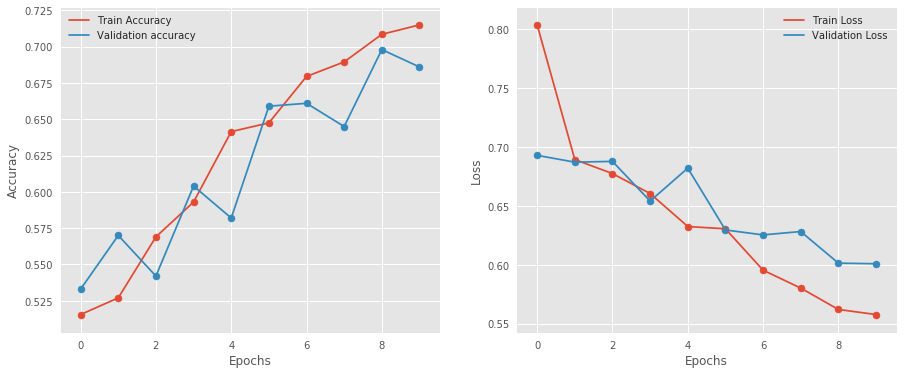

In [17]:
plot_acc_loss(history)

## Combining Various Data Augmentations
Combining above tried augmentations

In [18]:
train_img_gen = ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=.15, height_shift_range=.15, horizontal_flip=True, zoom_range=0.5)
train_data_gen = train_img_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

val_img_gen = ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=.15, height_shift_range=.15, horizontal_flip=True, zoom_range=0.5)
val_data_gen = val_img_gen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Model Creation, Compilation and Fitting

In [19]:
%%time

conv_model1 = create_conv_model(0.3)
conv_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = conv_model1.fit_generator(train_data_gen,epochs=10, validation_data=val_data_gen)

Epoch 1/10
63/63 [==============================] - 24s 375ms/step - loss: 1.1961 - accuracy: 0.4835 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 21s 337ms/step - loss: 0.6937 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 21s 338ms/step - loss: 0.6932 - accuracy: 0.4780 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 21s 339ms/step - loss: 0.6933 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 22s 345ms/step - loss: 0.6932 - accuracy: 0.4895 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 21s 339ms/step - loss: 0.6933 - accuracy: 0.4830 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 21s 337ms/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6931 - val_accuracy: 0.5000

### Plotting Resulting Accuracy and Loss

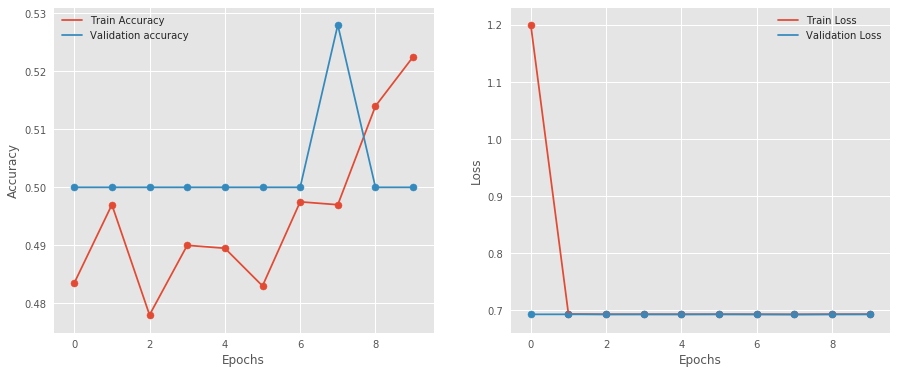

In [20]:
plot_acc_loss(history)

# MobileNet

In [21]:
train_img_gen = ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=.15, height_shift_range=.15, horizontal_flip=True, zoom_range=0.5)
train_data_gen = train_img_gen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

val_img_gen = ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=.15, height_shift_range=.15, horizontal_flip=True, zoom_range=0.5)
val_data_gen = val_img_gen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Model Creation

In [22]:
conv_feature_extractor = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4', input_shape=(224, 224, 3))
])

conv_feature_extractor.trainable = False

mobile_net = tf.keras.Sequential([
  conv_feature_extractor,
  Dense(1, activation='sigmoid')
])

mobile_net.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 1280)              2257984   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


### Model Compilation and Fitting

In [23]:
%%time

mobile_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = mobile_net.fit_generator(train_data_gen,epochs=10,validation_data=val_data_gen)

Epoch 1/10
63/63 [==============================] - 50s 798ms/step - loss: 0.2730 - accuracy: 0.8935 - val_loss: 0.1590 - val_accuracy: 0.9430
Epoch 2/10
63/63 [==============================] - 40s 631ms/step - loss: 0.1456 - accuracy: 0.9470 - val_loss: 0.1202 - val_accuracy: 0.9590
Epoch 3/10
63/63 [==============================] - 41s 645ms/step - loss: 0.1242 - accuracy: 0.9540 - val_loss: 0.1334 - val_accuracy: 0.9420
Epoch 4/10
63/63 [==============================] - 40s 639ms/step - loss: 0.1237 - accuracy: 0.9505 - val_loss: 0.1078 - val_accuracy: 0.9600
Epoch 5/10
63/63 [==============================] - 40s 639ms/step - loss: 0.1158 - accuracy: 0.9560 - val_loss: 0.1081 - val_accuracy: 0.9560
Epoch 6/10
63/63 [==============================] - 40s 642ms/step - loss: 0.1144 - accuracy: 0.9585 - val_loss: 0.1100 - val_accuracy: 0.9600
Epoch 7/10
63/63 [==============================] - 40s 635ms/step - loss: 0.0972 - accuracy: 0.9615 - val_loss: 0.1114 - val_accuracy: 0.9560

### Plotting Resulting Accuracy and Loss

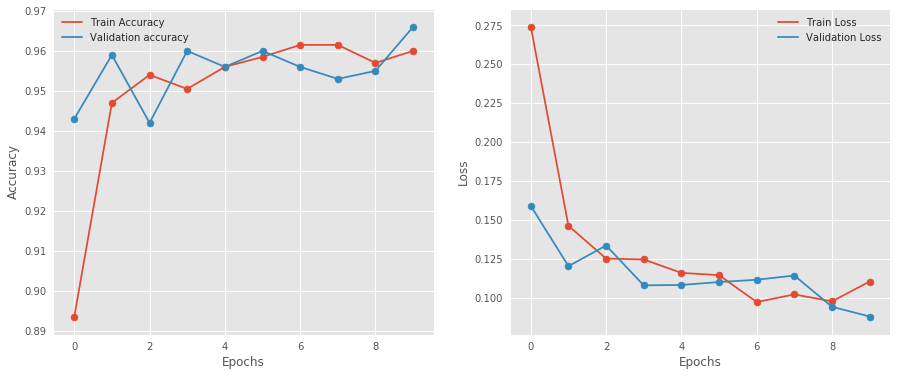

In [24]:
plot_acc_loss(history)

# ResNet v2 50

In [25]:
train_img_gen = ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=.15, height_shift_range=.15, horizontal_flip=True, zoom_range=0.5)
train_data_gen = train_img_gen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

val_img_gen = ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=.15, height_shift_range=.15, horizontal_flip=True, zoom_range=0.5)
val_data_gen = val_img_gen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Loading Resnet50 v2 Feature Extractor with Imagenet Weights

In [26]:
resnet50_v2_feature_extractor = tf.keras.applications.ResNet50V2(input_shape=(224,224,3), include_top=False, weights='imagenet')
resnet50_v2_feature_extractor.trainable = False

94674944/94668760 [==============================] - 2s 0us/step


Below we are checking output shape of extractor as we need to set our model in a way that it outputs probability of cat or dog.

In [27]:
for images, labels in train_data_gen:
    feature_batch = resnet50_v2_feature_extractor(images)
    print(feature_batch.shape)
    break

(32, 7, 7, 2048)


Below we are averaging output of feature extractor using average pooling layer

In [28]:
global_average_pooling = GlobalAveragePooling2D()
feature_batch_average = global_average_pooling(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


Converting output to probability between 0-1 using sigmoid

In [29]:
prediction_layer = Dense(1, activation='sigmoid')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


### Model Creation

In [30]:
restnet50_v2 = tf.keras.Sequential([
  resnet50_v2_feature_extractor,
  GlobalAveragePooling2D(),
  Dense(1, activation='sigmoid')
])

### Model Compilation and Fitting

In [31]:
%%time

restnet50_v2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = restnet50_v2.fit_generator(train_data_gen,epochs=10, validation_data=val_data_gen)

Epoch 1/10
63/63 [==============================] - 51s 813ms/step - loss: 0.4266 - accuracy: 0.8035 - val_loss: 0.1563 - val_accuracy: 0.9390
Epoch 2/10
63/63 [==============================] - 47s 750ms/step - loss: 0.2615 - accuracy: 0.8980 - val_loss: 0.1447 - val_accuracy: 0.9420
Epoch 3/10
63/63 [==============================] - 47s 747ms/step - loss: 0.2160 - accuracy: 0.9135 - val_loss: 0.1729 - val_accuracy: 0.9390
Epoch 4/10
63/63 [==============================] - 47s 747ms/step - loss: 0.2047 - accuracy: 0.9110 - val_loss: 0.1708 - val_accuracy: 0.9320
Epoch 5/10
63/63 [==============================] - 48s 760ms/step - loss: 0.2032 - accuracy: 0.9145 - val_loss: 0.1316 - val_accuracy: 0.9520
Epoch 6/10
63/63 [==============================] - 47s 753ms/step - loss: 0.1990 - accuracy: 0.9200 - val_loss: 0.2829 - val_accuracy: 0.9110
Epoch 7/10
63/63 [==============================] - 47s 748ms/step - loss: 0.1868 - accuracy: 0.9220 - val_loss: 0.2148 - val_accuracy: 0.9240

### Plotting Resulting Accuracy and Loss

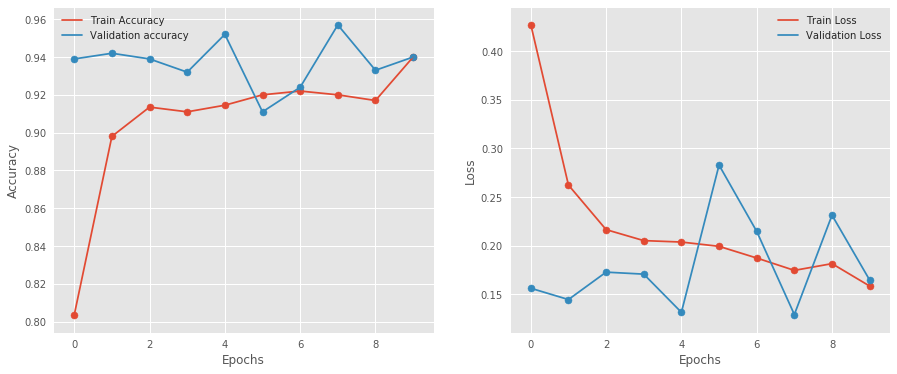

In [32]:
plot_acc_loss(history)

# RestNet v2 101

In [33]:
train_img_gen = ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=.15, height_shift_range=.15, horizontal_flip=True, zoom_range=0.5)
train_data_gen = train_img_gen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

val_img_gen = ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=.15, height_shift_range=.15, horizontal_flip=True, zoom_range=0.5)
val_data_gen = val_img_gen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Loading ResNet101 v2 Feature Extractor with ImageNet Weights

In [34]:
resnet101_v2_feature_extractor = tf.keras.applications.ResNet101V2(input_shape=(224,224,3), include_top=False, weights='imagenet')
resnet101_v2_feature_extractor.trainable = False

171319296/171317808 [==============================] - 5s 0us/step


### Model Creation

In [35]:
restnet101_v2 = tf.keras.Sequential([
  resnet101_v2_feature_extractor,
  GlobalAveragePooling2D(),
  Dense(1, activation='sigmoid')
])

### Model Compilation and Fitting

In [36]:
%%time

restnet101_v2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = restnet101_v2.fit_generator(train_data_gen,epochs=10,validation_data=val_data_gen)

Epoch 1/10
63/63 [==============================] - 64s 1s/step - loss: 0.3725 - accuracy: 0.8420 - val_loss: 0.1281 - val_accuracy: 0.9410
Epoch 2/10
63/63 [==============================] - 59s 937ms/step - loss: 0.2383 - accuracy: 0.9120 - val_loss: 0.1293 - val_accuracy: 0.9440
Epoch 3/10
63/63 [==============================] - 59s 938ms/step - loss: 0.2118 - accuracy: 0.9155 - val_loss: 0.1882 - val_accuracy: 0.9360
Epoch 4/10
63/63 [==============================] - 61s 962ms/step - loss: 0.1986 - accuracy: 0.9205 - val_loss: 0.1340 - val_accuracy: 0.9530
Epoch 5/10
63/63 [==============================] - 59s 931ms/step - loss: 0.1771 - accuracy: 0.9290 - val_loss: 0.2098 - val_accuracy: 0.9300
Epoch 6/10
63/63 [==============================] - 61s 962ms/step - loss: 0.2004 - accuracy: 0.9100 - val_loss: 0.1479 - val_accuracy: 0.9510
Epoch 7/10
63/63 [==============================] - 61s 961ms/step - loss: 0.1732 - accuracy: 0.9260 - val_loss: 0.1526 - val_accuracy: 0.9490
Ep

### Plotting Resulting Accuracy and Loss

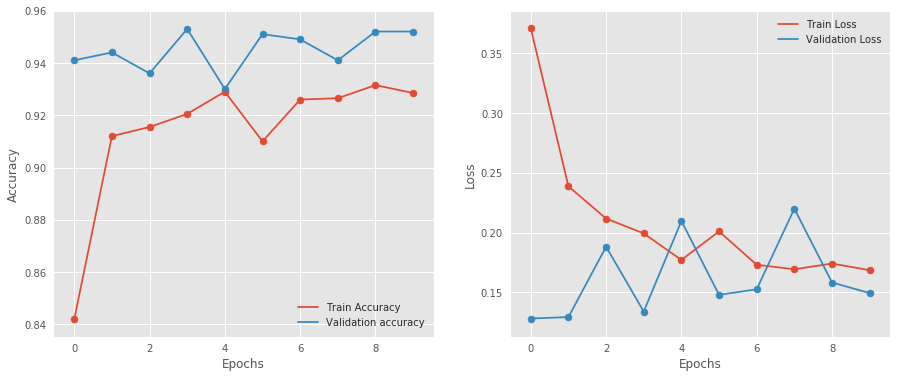

In [37]:
plot_acc_loss(history)